<a href="https://colab.research.google.com/github/MUHAMMADFAWWAZWIYOGA/DIF2130_A_25_2311532019/blob/main/Pratikum2/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

In [6]:
from pandas import read_csv+

In [7]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [8]:
diabetes=pd.read_csv('diabetes.csv',na_values=['?'])

In [21]:
dataset_url= '/content/diabetes.csv'
df = pd.read_csv(dataset_url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
# prompt: BUATKAN X SHAPE KOLOM MENJADI 7

import pandas as pd
from pandas import read_csv
import warnings

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

dataset_url= '/content/diabetes.csv'
df = pd.read_csv(dataset_url)

# Select features and target variable
features_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']
X = df[features_cols]
y = df.Outcome

# No need to reshape x to 7 columns.  The provided code already creates 'x'
# as a DataFrame with 7 columns based on 'features_cols'.
# If you intended to reshape the data in some way (e.g. to a 7xN matrix),
# please provide further specifics.  For example:
#  - Are you trying to create 7 equally sized subsets of the data?
#  - Are you looking to reduce the dimensionality of the data in some way?
#  - etc.


print(x.shape) # This will show the current shape of x


(768, 7)


In [64]:
x.shape


(768, 7)

In [62]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=16)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(random_state=16)
logreg.fit(Xtrain, ytrain)
ypred = logreg.predict(Xtest)


In [66]:
from sklearn import metrics

cnf_metrix = metrics.confusion_matrix(ytest, ypred)
print(cnf_metrix)


[[134  13]
 [ 35  49]]


Text(0.5, 23.52222222222222, 'Predicted Label')

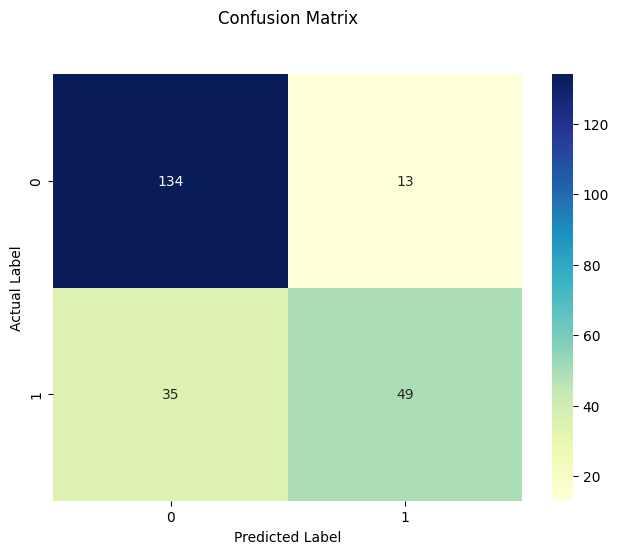

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Corrected function name from 'heatpmap' to 'heatmap'
sns.heatmap(pd.DataFrame(cnf_metrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('bottom')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# AKURASI

# PRESISI

# RECAL

# F1-SCORE

In [76]:
from sklearn.metrics import classification_report
target_names  = ['without diabetes', 'with diabetes']
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       147
           1       0.79      0.58      0.67        84

    accuracy                           0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



# ROC CURVE

roc adlaah grafik yangg digunakna untuk mengevaluasi kinerja mdoe klasifikasi, terutama dalam binary classificaaation ( klasifikasi dua kelas ). ROC curve menunjukan keseimbangan antara True Positife rate (TPR) dan False positive RATE (FPR) pada berbagai ambang batas ( tresshold)

ROC curve sangat bergunak ketika kita ingin memahami seberapa baik model bisa membedajkan antara kelas positif, dan negatif terutam ketika dataset me=memilik distribusi yang tidak seimbang

ROC curve sangat bagus mendekati pjok kiri atas, yang mendekati false psotiife dan true positif

<function matplotlib.pyplot.show(close=None, block=None)>

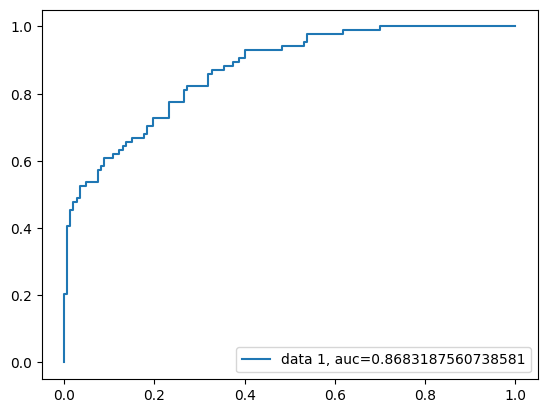

In [75]:
y_pred_proba = logreg.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest, y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show


# AREA UNDER CURVE

- untuk mempermudah interpretasi ROC curve, kita bisa menghitung area under the curve, yaitu luas di bawah ROC curve
- mengukur seberapa baik model membedakn kelas positif dan negatif (  semakin tinggi, semakin baik )
- AUC scroe untuk case 0.88
AUC score represent a perfect classifier, and 05, represent aworthless classifier
